In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Ajustamos las rutas de los archivos 
sales = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/sales_train.csv")
items = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/shops.csv")
item_categories = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/item_categories.csv")


In [16]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [17]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


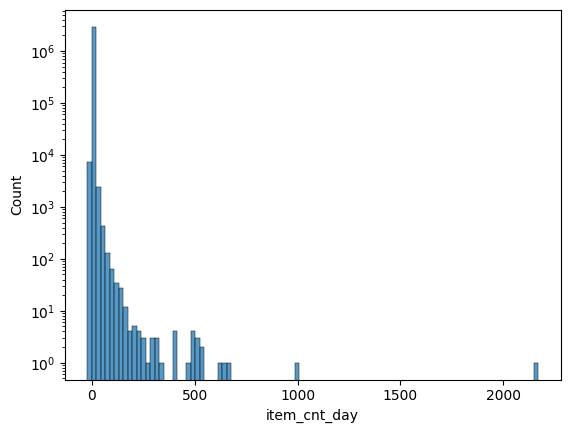

In [6]:
#Vamos a comenzar con la variable importante item_cnt_day, porque son el number of products sold
sales["item_cnt_day"].describe()
sns.histplot(sales["item_cnt_day"], bins=100)
plt.yscale("log")



In [ ]:
#Podemos observar cómo hay ventas negativas, probablemnte sean devoluciones, distribución de ventas diarias
#por producto–tienda. Hay outliers en valores altos por lo que la gráfica está sesgada a la derecha. La mayoría de 
#los valores se encuentran en valores pequeños. Para un producto específico, en una tienda específica, en un día específico,
#lo más común es vender 0 o 1 unidades.Esta gráfica es una mezcla de todos los días del histórico.

In [33]:
# convertimos las dates a fechas
sales["date"] = pd.to_datetime(sales["date"], format="%d.%m.%Y")

In [34]:
daily_total = (
    sales
    .groupby("date", as_index=False)
    .agg(total_sales=("item_cnt_day", "sum"))
)

daily_total.describe()


,date,total_sales
count,1034,1034.000000
mean,2014-06-01 12:00:00,3528.245648
min,2013-01-01 00:00:00,1274.000000
25%,2013-09-16 06:00:00,2472.250000
50%,2014-06-01 12:00:00,3145.000000
75%,2015-02-14 18:00:00,4257.000000
max,2015-10-31 00:00:00,13343.000000
std,NaN,1584.687467


In [ ]:
#En promedio se venden 3528.24 unidades de producto por día 

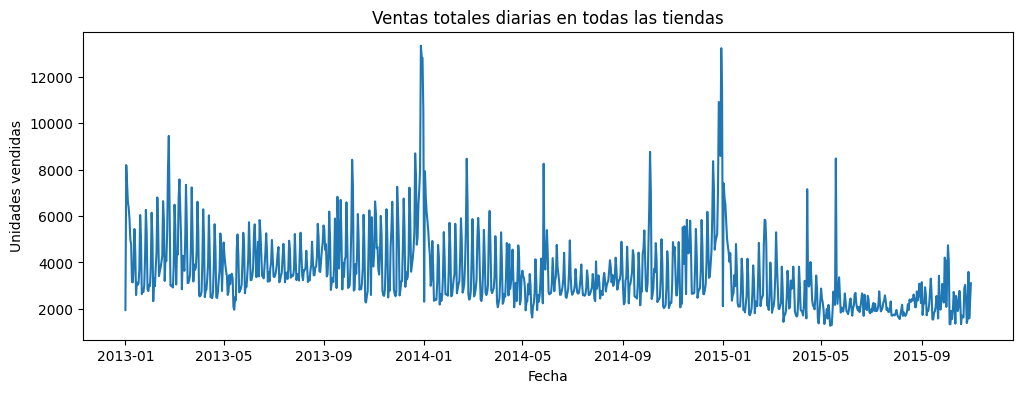

In [23]:
plt.figure(figsize=(12,4))
plt.plot(daily_total["date"], daily_total["total_sales"])
plt.title("Ventas totales diarias en todas las tiendas")
plt.ylabel("Unidades vendidas")
plt.xlabel("Fecha")
plt.show()


In [25]:
sales["year"] = sales["date"].dt.year
sales["month"] = sales["date"].dt.month

monthly_sales = (
    sales
    .groupby(["year", "month", "shop_id", "item_id"], as_index=False)
    .agg(item_cnt_month=("item_cnt_day", "sum"))
)

monthly_sales.head(10)


,year,month,shop_id,item_id,item_cnt_month
0,2013,1,0,32,6.0
1,2013,1,0,33,3.0
2,2013,1,0,35,1.0
3,2013,1,0,43,1.0
4,2013,1,0,51,2.0
5,2013,1,0,61,1.0
6,2013,1,0,75,1.0
7,2013,1,0,88,1.0
8,2013,1,0,95,1.0
9,2013,1,0,96,1.0


In [ ]:
#Con esto ya observamos por tienda individual, mensualemnte, cuanto se vende de cada producto específico. 

In [35]:
monthly_sales["item_cnt_month"].describe()


count    1.609124e+06
mean     2.267200e+00
std      8.649882e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.253000e+03
Name: item_cnt_month, dtype: float64

In [ ]:
#La mediana es vender 1 producto especifico por tienda especifica por mes, pero las cantidades grandes hacen que la media 
#se incline hacia 2.2 unidades de cada producto vendidas por tienda al mes. En promedio se venden 2.2 unidades de cada producto
#en cada tienda mensualmente, aunque esto no sea lo más frecuente. 

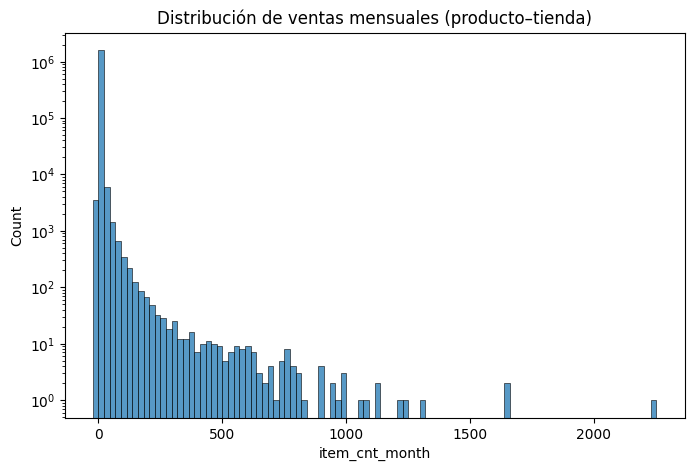

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(monthly_sales["item_cnt_month"], bins=100)
plt.yscale("log")
plt.title("Distribución de ventas mensuales (producto–tienda)")
plt.show()


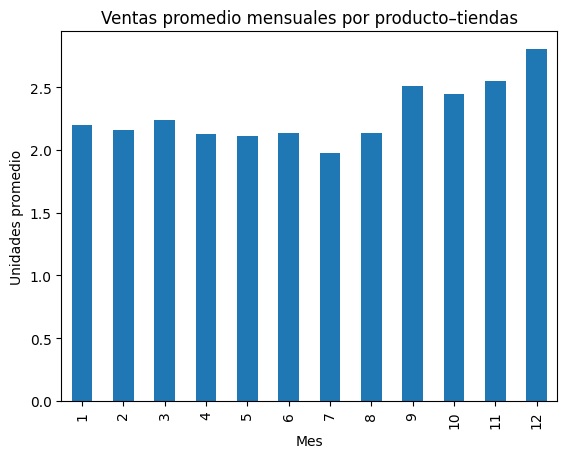

In [39]:
monthly_sales.groupby("month")["item_cnt_month"].mean().plot(kind="bar")
plt.title("Ventas promedio mensuales por producto–tiendas")
plt.ylabel("Unidades promedio")
plt.xlabel("Mes")
plt.show()



In [ ]:
#Podemos ver cómo noviembre y diceiembre son nuestros mejores meses, los dos meses que más vendemos cantidad de producto por tienda. 

In [41]:
shop_volume = (
    monthly_sales
    .groupby("shop_id")["item_cnt_month"]
    .sum()
    .sort_values(ascending=False)
)

shop_volume.head(60)


shop_id
31    310777.0
25    241920.0
54    185790.0
28    184557.0
42    144934.0
57    141107.0
27    136657.0
6     100489.0
58     81734.0
46     78990.0
56     78079.0
50     76238.0
12     73478.0
19     73455.0
15     71201.0
35     69016.0
21     68560.0
26     67890.0
47     67637.0
7      67058.0
18     65486.0
24     63886.0
55     63388.0
53     61657.0
16     61633.0
30     60828.0
22     60230.0
29     58713.0
38     53886.0
43     50608.0
52     49744.0
41     49324.0
59     48993.0
51     48767.0
14     46375.0
37     46256.0
44     44938.0
4      43942.0
5      42762.0
45     41895.0
2      30620.0
3      28355.0
17     25838.0
48     24909.0
10     24523.0
13     19763.0
49     17090.0
39     16617.0
9      15866.0
0      11705.0
32      8781.0
23      7705.0
34      6451.0
1       6311.0
20      5872.0
33      5482.0
40      4943.0
8       3595.0
11       572.0
36       330.0
Name: item_cnt_month, dtype: float64

In [ ]:
#Vemos que la tienda con el id 36 es la que menos vende  (Sólo ha vendido 330 unidades en todo el historico )

In [ ]:
#Eso se nos hizo muy raro, así´que investigamos y vimos que solo lleva abierta un mes. 

In [44]:
shop36 = monthly_sales[monthly_sales["shop_id"] == 36]

shop36[["year", "month"]].assign(
    year_month=lambda x: x["year"].astype(str) + "-" + x["month"].astype(str)
).agg(
    min_month=("year_month", "min"),
    max_month=("year_month", "max")
)


,year_month
min_month,2015-10
max_month,2015-10


In [45]:
item_volume = (
    monthly_sales
    .groupby("item_id")["item_cnt_month"]
    .sum()
    .sort_values(ascending=False)
)

item_volume.head(10)


item_id
20949    187642.0
2808      17245.0
3732      16642.0
17717     15830.0
5822      14515.0
3734      11688.0
6675      10289.0
3731      10099.0
1855      10032.0
16787      9227.0
Name: item_cnt_month, dtype: float64

In [ ]:
#Nuestro producto más vendido es el 20949 con 187,642 unidades vendidas en estos 3 años 

In [49]:
sales = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/sales_train.csv")
items = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/items.csv")
shops = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/shops.csv")
item_categories = pd.read_csv("C:/Users/emil_/Desktop/ITAM_Maestrtía/GranEscala/Tarea01/competitive-data-science-predict-future-sales/item_categories.csv")

monthly_sales = monthly_sales.merge(items, on="item_id", how="left")
monthly_sales = monthly_sales.merge(item_categories, on="item_category_id", how="left")
monthly_sales = monthly_sales.merge(shops, on="shop_id", how="left")
category_volume = (
    monthly_sales
    .groupby("item_category_id")["item_cnt_month"]
    .sum()
    .sort_values(ascending=False)
)

category_volume.head(10)



item_category_id
40    634171.0
30    456540.0
55    348591.0
19    254887.0
37    203284.0
71    187998.0
28    174954.0
23    169944.0
20    127319.0
65     73077.0
Name: item_cnt_month, dtype: float64

In [ ]:
#Al agregar estas columnas vemos que la categoría 40 vendió aproximadamente 634,171 unidades en estos 3 años, siendo la categría 40, 30 y 55 las más vendidas. 


In [51]:
shop_activity = (
    monthly_sales
    .assign(year_month=lambda x: pd.to_datetime(
        x["year"].astype(str) + "-" + x["month"].astype(str) + "-01"
    ))
    .groupby("shop_id")["year_month"]
    .agg(
        start_month="min",
        end_month="max"
    )
    .reset_index()
)

shop_activity.head(60)


,shop_id,start_month,end_month
0,0,2013-01-01,2013-02-01
1,1,2013-01-01,2013-02-01
2,2,2013-01-01,2015-10-01
3,3,2013-01-01,2015-10-01
4,4,2013-01-01,2015-10-01
5,5,2013-02-01,2015-10-01
6,6,2013-01-01,2015-10-01
7,7,2013-01-01,2015-10-01
8,8,2013-01-01,2013-04-01
9,9,2013-10-01,2015-10-01


In [ ]:
#Vemos que salvo por muy pocas tiendas y por muy poco tiempo, casi todas las 60 tiendas llevan operando los 3 años